Для выполнения данного задания необходимо:

Изучить статью "Метод наименьших квадратов: формулы, код и применение"

Повторить все этапы работы в собственном блокноте (включая формулы (текстовые ячейки) и графики)

Написать построенные комментарии в коде (используйте #)
По аналогии с примером из статьи придумать собственный набор данных

Реализовать весь процесс, описанный в статье с собственным набором данных (обратите внимание на распределение и блок статьи с дополнительными данными (выбросами))

Проверить результаты работы с помощью библиотеки sklearn (LinearRegression)

Написать выводы о проделанной работе

#Изучим статью "Метод наименьших квадратов"

In [1]:
#Метод наименьших квадратов - математический метод, применяемый для решения различных задач,
#основанный на минимизации суммы квадратов отклонений некоторых функций от экспериментальных входных данных
# Самарский А.А предложил универсальную методологию вычисления эксперимента в виде триады "модель алгоритм-мпрограмма"
  # Путь от модели объекта к программе лежит через её алгоритмическое описание:
  #   1. описать мат. модель объекта, анализиреумые параметры которой формализуется в виде некой функциональной зависимости
  #   2. синтезировать алгоритм оценки искомых параметров модели на основе МНК
  #   3. выполнить программную реализацию полученного алгоритма

$$ y_i = w_0+w_1* x_i + E_i$$
$w_0$ - действительное значение свободного весового коэффицента модели

$w_1$ - действительное значение весового коэффицента модели

$E_i$ - белый гауссовский(нормаальный) шум

сгенерированный набор данных имеет вид


Text(0, 0.5, 'y (оценка температуры)')

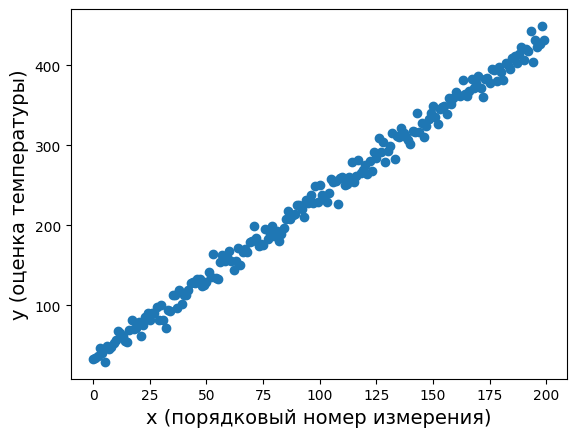

In [2]:
#импортируем несколько библиотек
import random
# генерирует случайные числа
import matplotlib.pyplot as plt
# для отрисовки графиков
import numpy as np
# для работы с числовыми данными

# код реализуемый выше приведенное выражение с заданными начальными значениями:

# - действительных значений весовых коэффицентов W0 = 2; W1 = 34,2
# - размер генерируемого набора данных n = 200
# - порядковый номер измерений тепературы (i) меняется от 0 до 199 с шагом 1
# - значениее среднеквадратического отклонения шума добавляемого к данным q(E) = 10
# - математическое ожидание шума добавляемого к данным u(E) = 0
# - фиксируемое начальное состояния генератора случайных чисел для повторяемости результатов (random_state = 42)

def datasets_make_regression(coef, data_size, noise_sigma, random_state):
    x = np.arange(0, data_size, 1.)
    mu = 0.0
    random.seed(random_state)
    noise = np.empty((data_size, 1))
    y = np.empty((data_size, 1))

    for i in range(data_size):
        noise[i] = random.gauss(mu, noise_sigma)
        y[i] = coef[0] + coef[1]*x[i] + noise[i]

    return x, y

coef_true = [34.2, 2.] # весовые коэффициенты
data_size = 200 # размер генерируемого набора данных
noise_sigma = 10 # СКО шума в данных
random_state = 42
x_scale, y_estimate = datasets_make_regression(coef_true, data_size, noise_sigma, random_state)

print("сгенерированный набор данных имеет вид")
plt.plot(x_scale, y_estimate, 'o')
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (оценка температуры)', fontsize=14)


"рис.1. Зависимость температуры от времени"

##Математическая модель


###Общее описание модели

 Математическую модель в общем виде можно представить
 $$
 \begin{align}
  f(w^*_{j=⃗{1, u}}, x_{i=\vec{1, n}, j=\vec{1, k}}) = \widehat{y}_{i = \vec{1, n}}(w^*, x) \\
  w^*_{j = \vec{1, m}} = argmin[Q(\widehat{y}_{i = \vec{1, n}}(W^*, x), y_{i = \vec{1, n}})]
  \end{align}
  $$
 Где
 1. $x_{i = \vec{1, n}, j = \vec{1, k}}$ - набор  из n значений объекта, где в каждоый i-ый момент измеряется k его параметров (матрица размерности n*k)
 2. $i = \vec{1, n}$ - обозначение набора из n индексов вида i - 1, 2, 3//n,
3. $w^*_{j = \vec{1, u}}$ - вектор параметров модели разностью u
4. $\widehat{y}_{i = \vec{1, n}}(w^*, x)$ - i-ая оценка ответа
5. f - ф-ция, которая i-ый набор значений из k параметров объекта, преобразуется с использованием вектора параметров w в i-ое значение ответа $y_i$
6. Q - неотрицательноефункция о шибки, оценивающая расстояние между рассчитанными значениями $y_{i = \vec{1, n}}$ и измеренным $\widehat{y}_{i = \vec{1, n}}$ на основе выбранной метрики




###Общее описание линейной модели
Используем линейную относительно параметров, т.к имеем нормальное распределение с нулевым значением. Метрика - СКО ошибки

$$
W^*_0 +\sum^m_{j = 1}w^*_j* x_{ij} = \widehat{y}_i(w^*, x) \\
Q(w^*, x) = \frac{1}{n} \sum^n_{i=1}(\widehat{y}_i(w^*, x) - y_i)^2 \\
w^*_{j = \vec{1, m}} = argmin[Q(w^*, x)]
$$
Где
1. $x_{i=\vec{1, n}, j = \vec{1, m}}$ - набор n значений объекта, где в каждый i-ый момент измеряется m его параметров (матрица размерности n*m)
2. $w^*_0$ - свободный коэффицент модели
3. $w^*_{j = \vec{1, m}}$ - ветор весовых коэффицентов модели размерностью m
4. $\widehat{y}_i({w^*, x})$ - i-ая оценка ответа, полученная с использованием свободного коэффицента $w_0$ и вектора параметров модели размернростью $w^*$
5. $y_i$ - i-sq измеренный ответ
6. Q - неотрицательная функция ошибки, оценивающая расстояние между рассчитанными значениями $\widehat{y}_{i = \vec{1, n}}$ и измеренным $y_{i=\vec{1, n}}$ на основе выбранной метрики

система  иlow  подстрочный

###Третье описание мат. модели. Конкретизирована под условия примера.
####Линейная модель с 2-мя коэффицентами

$w^* =\binom{w^*_1}{ w_0}$, метрикой выберем расчёт среднеквадратической ошибки.


$$w^*_0+w^*_1*x_i =\widehat{y}_i(w^*, x)\\
Q(w^*_0, w^*_1, x) = \frac{1}{n} \sum^n_{i = 1}(\widehat{y}_i(w^*, x) - y_i)^2\\
[w^*_0, w^*_1] = argmin[Q(w^*_0, w^*_1, x)]$$

Где
1. $x_{i = \vec{1, n}}$ - набор из n  значений объектоа, где в каждый i-ый момент измеряется один его параметр (вестор разностью n)
2. $w^*_0$ - свободный коэффицент модели
3. $w^*_1$ - весовой коэффицент модели
4. $\widehat{y}(w^*, x)$ - i-ая оценка ответа, полученная с использованием свободного коэффицента $w^*_0$ и параметра модели $w^*_1$
5. $y_i$ - i-ый измеренный ответ
6. Q - неотрицательная функция ощибки, оценивающая расстояние между рассчитанными значениями $\widehat{y}_{i = \vec{1, n}}$  и измеренным $y_{i = \vec{1, n}}$ на основе выбранной метрики

##Алгоритмы и реализующие их программы
 Три алгоритмы, которые позволят определить зависимость изменения температуры печи от времени.
  Нахождение коэффицента последней модели заключается в нахождении переменных $w^*_0, w^*_1$, таким образом нахождение коэффицентов сводится к нахождению экстремума функции двух переменных $$Q(w^*_0, w^*_1, x) = \frac{1}{n}\sum^n_{i = 1}(w^*_0+w^*_1x_i-y_i)^2$$
   - найдём частные производный функции$Q(w^*_0, w^*_1, x)$ по искомым $w^*_0, w^*_1$
   -приравняем выражения к нулю
   - решим полученную систему из 2-ух уравнений с 2-мя неизвестными
Полученное решение и будет искомым параметром модели

Описание аналитического решения системы.Выполним расчёт $Q(w^*_0, w^*_1,x)$ по параметру $w^*_0$

Применим правила дифференцирования функции представленной в виде суммы
$ = \frac{1}{n}\sum^n_{i=1}2*(w^*_0+w^*_1x_i-y_i)*(\frac{∂w^*_0}{∂w^*_0}+\frac{∂(w^*_0+w^*_1x_i-y_i)}{\partial w^*_0}) = \frac{1}{n}∑^n_{i=1}2*(w^*_0+w^*_1x_i-y_i)*(\frac{\partial w^*_0}{∂w^*_0} + \frac {∂(w^*_1x_i)}{\partial w^*_0} - \frac{∂y_i}{∂w^*_0} = \frac{2}{n}\sum^n_{i=1}(w^*_0+w^*_1x_i-y_i))$

Выполним расчёт проиводной функции $Q(w^*_0, w^*_1,x_i)$ по параметр $w^*_1$ и применим правило дифференцирования функции представленной в виде суммы

$ = \frac{1}{n}∑^n_{i=1}2*(w^*_0+w^*_1x_i-y_i)*(\frac{\partial w^*_0}{∂w^*_1} + \frac {∂(w^*_1x_i)}{\partial w^*_1} - \frac{∂y_i}{∂w^*_1}) =
\frac{2}{n}\sum^n_{i=1}((w^*_0+w^*_1x_i-y_i)*x_i)$

Приравняем полученные производные к нулю и решим полученную систему уравнений

$$
\frac{2}{n}\sum^n_{i=1}(w^*_0+w^*_1x_i-y_i) = 0 \\
\frac{2}{n}\sum^n_{i=1}((w^*_0+w^*_1x_i-y_i)*x_i) =0
$$

Раскроем скобки и вынесем постоянные мноители за скобки
$n*w^*_0+w^*_1\sum^n_{i=1}x_i-\sum^n_{i=1}y_i =0\\
w^*_0\sum^n_{i=1}x_i+w^*_1\sum^n_{i=1}x_i^2-\sum^n_{i=1}y_ix_i = 0$

слагаемые с множетелем y вынесем в правую часть уравнения, а с множетелем x в левой части в порядке убывания
$
w^*_1\sum^n_{i=1}x_i^2+w^*_0\sum^n_{i=1}x_i = \sum^n_{i=1}y_ix_i \\
w^*_1\sum^n_{i=1}x_i+n*w^*_0 =\sum^n_{i=1}y_i
$
 для решения систему представим в матричной форме
 $
 \begin{pmatrix}
 \sum^n_{i=1}x_i^2 &\sum^n_{i=1}x_i \\
 \sum^n_{i=1}x_i & n
 \end{pmatrix}
 \begin{pmatrix}
 w^*_1 \\ w^*_0
 \end{pmatrix}
 = \begin{pmatrix}
 \sum^n_{i=1}y_ix_i \\ \sum^n_{i=1}y_i
 \end{pmatrix}
 $

Выразим вектор w* с искомыми весами выполнив умножение обеих частей равенства на обратную матрицу y
$
\begin{pmatrix}
w^*_1 \\w^*_0
\end{pmatrix}
= \begin{pmatrix}
\sum^n_{i=1}x_i^2 &\sum^n_{i=1}x_i \\
\sum^n_{i=1}x_i & n
\end{pmatrix} ^{-1}
\begin{pmatrix}
\sum^n_{i=1}y_ix_i \\ \sum^n_{i=1}y_i
\end{pmatrix}
$

Полученное выражение является решением системы уравнений и его можно уже использовать в качестве первого алгоритма оценки параметров модели. Ниже приведен код реализующий этот алгоритм.


In [3]:
# first algorithm
def coefficient_reg_inv(x, y):
    size = len(x)
    # формируем и заполняем матрицу размерностью 2x2
    A = np.empty((2, 2))
    A[[0], [0]] = sum((x[i])**2 for i in range(0,size))
    A[[0], [1]] = sum(x)
    A[[1], [0]] = sum(x)
    A[[1], [1]] = size
    # находим обратную матрицу
    A = np.linalg.inv(A)
    # формируем и заполняем матрицу размерностью 2x1
    C = np.empty((2, 1))
    C[0] = sum((x[i]*y[i]) for i in range(0,size))
    C[1] = sum((y[i]) for i in range(0,size))

    # умножаем матрицу на вектор
    ww = np.dot(A, C)
    return ww[1], ww[0]

[w0_1, w1_1] = coefficient_reg_inv(x_scale, y_estimate)
print(w0_1, w1_1)

[33.93193341] [2.01436546]


Применив аналитический расчёт обратной матрицы упростим выражение
  Найти обратную матрицу можно с использованием, например, алгебраических дополнений. Для пояснения поиска обратной матрицы введем новую переменную A. Пусть

  $$
  A = \begin{pmatrix}
  \sum^n_{i=1}x_i^2 & \sum^n_{i=1}x_i \\
  \sum^n_{i=1}x_i & n
  \end{pmatrix}
  $$
  тогда $$
  A^{-1} =\frac{1}{Δ}*(B)^T
  $$
   где
 $Δ = A_{11}A_{22} - A_{12}A{21}$ - определитель матрицы А

 $B = \begin{pmatrix} A_{22} & -A_{21} \\ -A_{12} & A_{11}
 \end{pmatrix} $- матрица алгебраических дополнений, составленная из миноров матрицы А

 (*)^T - транспонирование матрицы, указанной в скобках
      
   итоговое выражение для обратной матрицы представим в виде
   $$
   A^{-1} \ \frac{1}{A_{11}A_{22}-A_{12}A_{21}} \begin{pmatrix}
   A_{22} & -A_{12} \\
   -A_{21} & A_{11}
   \end{pmatrix}
   $$




Перепишем выражение $$
\begin{pmatrix}
w^*_1 \\w^*_0
\end{pmatrix}= \begin{pmatrix}
\sum^n_{i=1}x_i^2 &\sum^n_{i=1}x_i \\
\sum^n_{i=1}x_i & n
\end{pmatrix} ^{-1} \begin{pmatrix}
\sum^n_{i=1}y_ix_i \\ \sum^n_{i=1}y_i
\end{pmatrix}$$
 в виде
 $$
 \begin{pmatrix}
w^*_1 \\w^*_0
\end{pmatrix}= \frac{1}{n* \sum^n_{i=1}x_i^2 - \sum^n_{i=1}x_i * \sum^n_{i=1}x_i}
\begin{pmatrix}
n & -\sum^n_{i=1}x_i \\
-\sum^n_{i=1}x_i & \sum^n_{i=1}x_i^2
\end{pmatrix}
 $$
Упростим выражение раскрыв скобки, решение системы уравнений примет вид
$$
\begin{pmatrix}
w^*_1 \\ w^*_0
\end{pmatrix} =
\begin{pmatrix}
\frac{n*\sum^n_{i=1}y_ix_i - \sum^n_{i=1}x_i \sum^n_{i=1}y_i}{n \sum^n_{i=1}x_i^2 - (\sum^n_{i=1}x_i)^2} \\ \frac{- \sum^n_{i=1}x_i \sum^n_{i=1}y_ix_i + \sum^n_{i=1}x_i^2 \sum^n_{i=1}y_i}{n \sum^n_{i=1}x_i^2 - (\sum^n_{i=1}x_i)^2}
\end{pmatrix}
$$
Полученное выражение можно использовать в качестве $\textbf{второго алгоритма}$ оценки параметров модели. Ниже приведен код, реализующий этот алгоритм.

In [4]:
#second algorithm
def coefficient_reg_inv_analit(x, y):
    size = len(x)
    # выполним расчет числителя первого элемента вектора
    numerator_w1 = size*sum(x[i]*y[i] for i in range(0,size)) - sum(x)*sum(y)
    # выполним расчет знаменателя (одинаковый для обоих элементов вектора)
    denominator = size*sum((x[i])**2 for i in range(0,size)) - (sum(x))**2
    # выполним расчет числителя второго элемента вектора
    numerator_w0 = -sum(x)*sum(x[i]*y[i] for i in range(0,size)) + sum((x[i])**2 for i in range(0,size))*sum(y)

    # расчет искомых коэффициентов
    w1 = numerator_w1/denominator
    w0 = numerator_w0/denominator
    return w0, w1
# определить x_scale
[w0_2, w1_2] = coefficient_reg_inv_analit(x_scale, y_estimate)
print(w0_2, w1_2)

[33.93193341] [2.01436546]


Видно, что полученный результат совпадает с результатом, полученным с использованием предыдущего выражения.
Выполним дальнейшее упрощение полученного выражения , чтобы получить более компактную форму записи. Умножим числитель и знаменатель каждого элемента матрицы на $\frac{1}{n^2}$
$$
\begin{pmatrix}
w^*_1 \\ w^*_0
\end{pmatrix} =
\begin{pmatrix}
\frac{n*\sum^n_{i=1}y_ix_i - \sum^n_{i=1}x_i \sum^n_{i=1}y_i * \frac{1}{n^2}}{(n \sum^n_{i=1}x_i^2 - (\sum^n_{i=1}x_i)^2)* \frac{1}{n^2}} \\ \frac{- \sum^n_{i=1}x_i \sum^n_{i=1}y_ix_i + \sum^n_{i=1}x_i^2 \sum^n_{i=1}y_i * \frac{1}{n^2}}{(n \sum^n_{i=1}x_i^2 - (\sum^n_{i=1}x_i)^2)* \frac{1}{n^2}}
\end{pmatrix}
$$
 Раскроем скобки
 $$
  = \begin{pmatrix}
 \frac{\frac{1}{n}* \sum^n_{i=1}y_ix_i - (\frac{1}{n}* \sum^n_{i=1}x_i)*(\frac{1}{n}* \sum^n_{i=1}y_i)}{\frac{1}{n}* \sum^n_{i=1}x_i^2 - (\frac{1}{n} \sum^n_{i=1}x_i)^2} \\
 \frac{-(\frac{1}{n} \sum^n_{i=1}x_i)*(\frac{1}{n} \sum^n_{i=1}y_ix_i)+(\frac{1}{n} \sum^n_{i=1}x_i^2)*(\frac{1}{n} \sum^n_{i=1}y_i)}{\frac{1}{n} \sum^n_{i=1}x_i^2 -(\frac{1}{n} \sum^n_{i=1}x_i)^2}
 \end{pmatrix}
 $$

 введём новые переменные
 $
 1. \frac{1}{n}\sum^n_{i=1}x_i =\vec{x}
 -оценка МО величины х;$
 $2. \frac{1}{n}\sum^n_{i=1}y_i = \vec{y} - оценка МО величины y
  $
  $
  3.\frac{1}{n} \sum^n_{i=1}y_ix_i = \vec{xy} - оценка МО произведения величин x и y$
  $
  4. \frac{1}{n} \sum^n_{i=1}x_i^2 = \vec{x}^2 - оценка МO величины x^2
  $
  $
  5. \sqrt{ \frac{1}{n} \sum^n_{i=1}x_i^2 -(\frac{1}{n} \sum^n_{i=1}x_i)^2} = \sqrt{ \vec{x}^2 - \overline{x} = \sigma_x} - оценка СКО величины x
  $
  $
  6. \sqrt{\frac{1}{n}^n_{i=1}y_i^2 -(\frac{1}{n} \sum^n_{i=1}y_i)^2} = \sigma_y -оценка СКО величины y
  $
  $
  7. \frac{ \overline{xy} -\overline{x} \overline{y}}{\sigma_x \sigma_y} = r_{xy} -oценка линейного коэффицента корреляции величин x y
  $

  Искомый веотр примет вид
  $$
\begin{pmatrix}
  w^*_1 \\ w^*_0
\end{pmatrix}
   = \begin{pmatrix}
   {\frac{ \overline{xy} - \overline{x} \overline{y}}{\sigma_x^2} \\
   \frac{- \overline{x} \overline{xy}+ \overline{x}^2 \overline{y}}{\sigma^2_x}}
   \end{pmatrix}
  $$

  Домножим весовой коэффицент $w^*_1$ на $1 = \frac{\sigma_x}{\sigma_y}$
  $$
  w^*-1 = (\frac{\overline{xy} - \overline{x} \overline{y}}{\sigma_x \sigma_y}) \frac{\sigma_y}{\sigma_x} = r_{xy} \frac{\sigma_y}{\sigma_x}
  $$
  Прибавим к числителю $w^*_0$ свободного коэффицента $0 = \overline{x}^2+ \overline{x}^2$
  $$
  w^*_0 = \overline{y} - \overline{x} r_{xy}* \frac{\sigma_y}{\sigma_x} = \overline{y} - \overline{x} *w^*_1
  $$

  Таким образом  итоговое выражение представим в виде

  $$
w^*_1 = r_{xy} \frac{\sigma_y}{\sigma_x} \\
w^*_0 = \overline{y} - \overline{x} w^*_1
  $$
  Полученное выражение можно использовать в качестве $\textbf{третьего}$ алгоритма оценки параметров модели. Ниже приведен код, реализующий этот алгоритм.
  

In [5]:
#third algorithm
def coefficient_reg_stat(x, y):
    size = len(x)
    avg_x = sum(x)/len(x) # оценка МО величины x
    avg_y = sum(y)/len(y) # оценка МО величины y
    # оценка МО величины x*y
    avg_xy = sum(x[i]*y[i] for i in range(0,size))/size
    # оценка СКО величины x
    std_x = (sum((x[i] - avg_x)**2 for i in range(0,size))/size)**0.5
    # оценка СКО величины y
    std_y = (sum((y[i] - avg_y)**2 for i in range(0,size))/size)**0.5
    # оценка коэффициента корреляции величин x и y
    corr_xy = (avg_xy - avg_x*avg_y)/(std_x*std_y)

    # расчет искомых коэффициентов
    w1 = corr_xy*std_y/std_x
    w0 = avg_y - avg_x*w1
    return w0, w1
[w0_3, w1_3] = coefficient_reg_stat(x_scale, y_estimate)
print(w0_3, w1_3)


[33.93193341] [2.01436546]


Сравним полученные значения с результатом работы процедуры библиотеки $\textit{sklearn}$.



##Sklearn

In [6]:
from sklearn.linear_model import LinearRegression
# преобразование размерности массива x_scale для корректной работы model.fit
x_scale = x_scale.reshape((-1,1))
model = LinearRegression()
model.fit(x_scale, y_estimate)
print(model.intercept_, model.coef_)

[33.93193341] [[2.01436546]]


Видно, что полученный результат полностью совпадает с результатами, полученными ранее.

Bизуализируем полученный результат, построив прямую с использованием рассчитанных коэффициентов и сопоставим их с исходными данными

Text(0, 0.5, 'y (оценка температуры)')

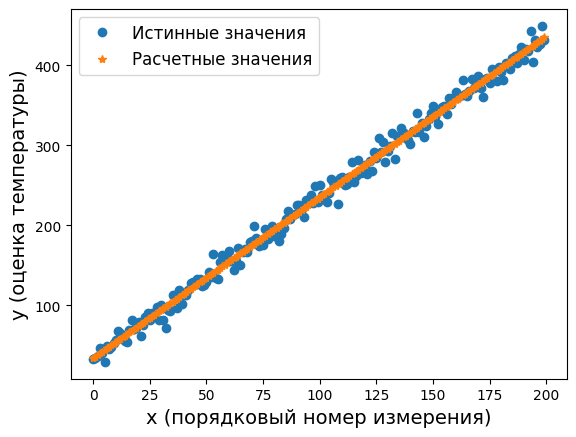

In [7]:
def predict(w0, w1, x_scale):
    y_pred = [w0 + val*w1 for val in x_scale]
    return y_pred

y_predict = predict(w0_1, w1_1, x_scale)

plt.plot(x_scale, y_estimate, 'o', label = 'Истинные значения')
plt.plot(x_scale, y_predict, '*', label = 'Расчетные значения')
plt.legend(loc = 'best', fontsize=12)
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (оценка температуры)', fontsize=14)

##Вывод
Таким образом удалось выполнить оценку параметров модели, которая описывает процесс изменения температуры в печи с минимальной ошибкой. Выведенные выражения и запрограммированные по ним три алгоритма, реализующие МНК при обработке одного набора измеренных температур, хотя и отличаются видом конечных выражений, дают одинаковые оценки.Эти выражения по сути «делают» одно и тоже, однако, позволяют давать различные интерпретации.

##Анализируем остатки
Усложним задачу, добавим визмеряемые данные несколько выбросов, которые могут возникнуть, например, в случае появлениия вблизи термомтра источника электромагнитных помех.
В рамках примера эти выбросы составляют5% от размера выборки $x_{i=\overline{1,n}}$. Попробуем оцнгить влияние  появившехся выбросов на получаемые последним алгоритмом  коэффицентов $w^*_0, w^*_1$ и, соответственно, вид рассчитываемой прямой.
Ниже представлен код , который реализует добавление в исходные данные аддитивные помеховые сигналы в виде периодических импульсов со следующими параметрами

  - количество выбросов в выборке = 10
  - длительность импульса - 1-му измерению
  - амплитуда импульса = 256
  - позиция первого импульса соответствует 10-му измерению
-период следования импульсов - каждые 20 измерений

Text(0, 0.5, 'y (оценка температуры)')

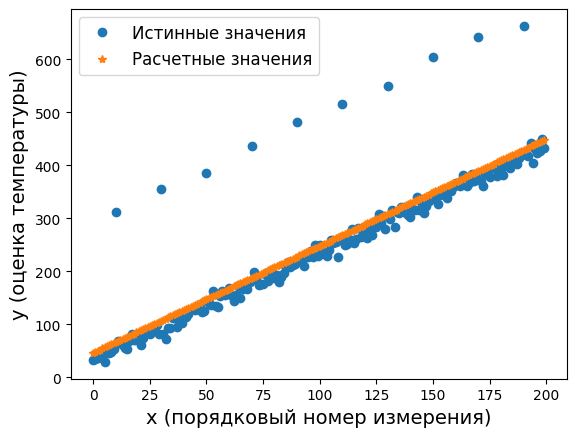

In [8]:
ni = 10 # количество выбросов
ind_impuls = np.arange(ni, data_size, 20) # индексы выбросов
y_estimate_imp = y_estimate.copy() # выборка с выбросами
for i in range(0, ni):
    y_estimate_imp[ind_impuls[i]] += 256

[w0_imp, w1_imp] = coefficient_reg_stat(x_scale, y_estimate_imp)
y_pred_imp = predict(w0_imp, w1_imp, x_scale)
plt.plot(x_scale, y_estimate_imp, 'o', label = 'Истинные значения')
plt.plot(x_scale, y_pred_imp, '*', label = 'Расчетные значения')
plt.legend(loc = 'best', fontsize=12)
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (оценка температуры)', fontsize=14)

На рисунке видно, что появление выбросов сместило, рассчитанную прямую в вверх. Модифицируем алгоритм оценки параметров модели за счет новой метрики, а именно оценки квадратов разности между измеренными и модельными данными, которая выполняется по выражению
$$
SE_i = (w^*_0+w^*_1x_i -y_i)^2, i =\overline{1, n}
$$
выполним расчёт и визуализируем полученные результат


Text(0, 0.5, 'Квадрат ошибки')

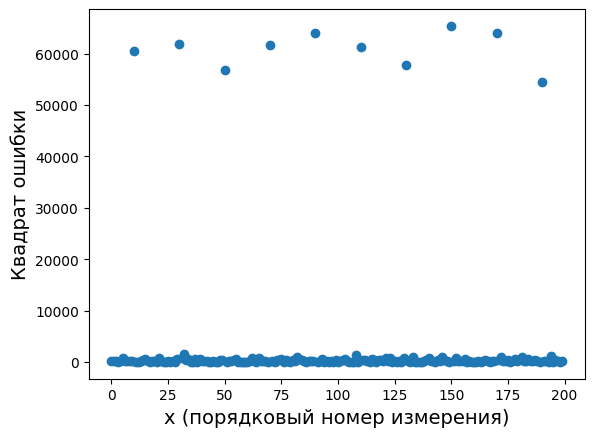

In [9]:
SqErr = (y_pred_imp - y_estimate_imp)**2

plt.plot(x_scale, SqErr, 'o')
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('Квадрат ошибки', fontsize=14)

Для устранения влияния помехи на оценки параметров модели, получаемых с использованием алгоритмов, дополнительно введем процедуру цензурирования (отбрасывания) данных, которые имеют большое значение квадрата ошибки. С новыми начальными условиями алгоритм оценки параметров модели теперь дополняется следующей последовательностью действий:
1. отсортируем по возрастанию значения, полученные по выражению $SE_i = (w^*_0+w^*_1x_i -y_i)^2, i =\overline{1, n}$
2. удалим значение из анализируемого набора данных, имеющее максимальное отклонение от расчётного
3. выполним оценку араметров модели $w^*_0, w^*_1$, испльзуя оставшиеся значения из набора данных
4. этап 2 и 3выполняем для 10% исходного набора данных(с запасом)

Text(0, 0.5, 'w1')

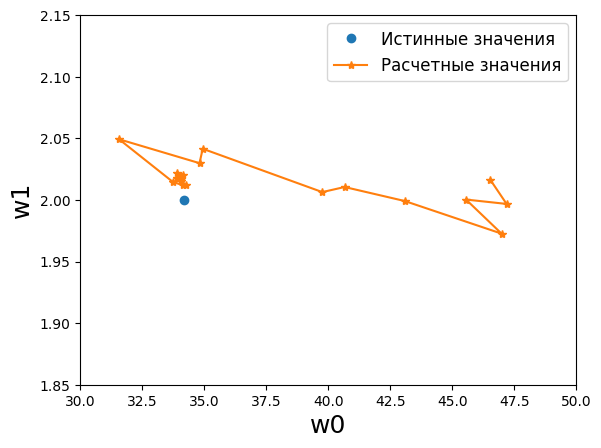

In [10]:
def censor_data(SqErr, nCensor):
    # индексы отсортированного во возрастанию массива с квадратами ошибок
    I = np.argsort(SqErr[:,0])
    ind_imp = I[-nCensor:]
    ind_imp = ind_imp[::-1] # разворот индексов массива
    w0 = np.empty((nCensor, 1))
    w1 = np.empty((nCensor, 1))

    for i in range(0,nCensor):
        # цензурирование данных
        x_scale_cens = np.delete(x_scale, ind_imp[0:i], 0)
        y_estimate_imp_cens = np.delete(y_estimate_imp, ind_imp[0:i], 0)
        # расчёт параметров модельной прямой
        w0[i], w1[i] = coefficient_reg_stat(x_scale_cens, y_estimate_imp_cens)
        y_pred2_cens = predict(w0[i], w1[i], x_scale_cens)
    return w0, w1

nCensor = 20 # количество отбрасываемых выбросов
[w0_с, w1_с] = censor_data(SqErr, nCensor)

plt.plot(coef_true[0], coef_true[1], 'o', label = 'Истинные значения')
plt.plot(w0_с, w1_с, '-*', label = 'Расчетные значения')
plt.legend(loc = 'best', fontsize=12)
plt.xlim((30, 50))
plt.ylim((1.85, 2.15))
plt.xlabel('w0', fontsize=18)
plt.ylabel('w1', fontsize=18)

В результате работы рассматриваемого алгоритма видно, что по мере цензурирования помеховых данных параметры модели приближаются к истинным (точка с оценкой параметров возле i=1 получена после удаления первой точки, точка с оценкой параметров возле i=20 получена после удаления двадцатой точки).

Ниже приведен код, который рассчитывает и строит на графике прямую, с использованием параметров модели, полученной на последнем шаге алгоритма c цензурированием. На этом рисунке видно, что использование дополнительной процедуры цензурирования данных на основе анализа остаточной суммы квадратов, позволяет улучшить согласование оцениваемых параметров с истинными.

Text(0, 0.5, 'Y (оценка температуры)')

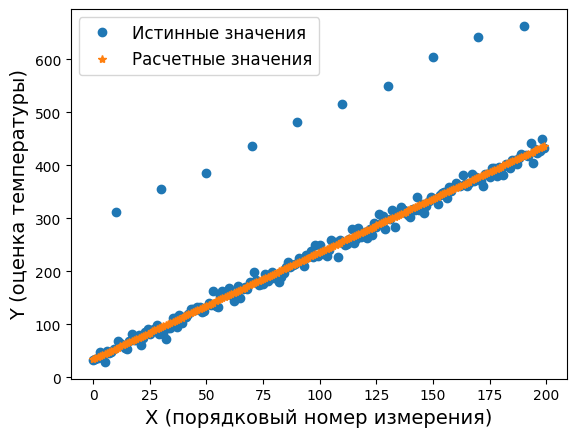

In [11]:
y_pred_censor = predict(w0_с[nCensor-1], w1_с[nCensor-1], x_scale)

plt.plot(x_scale, y_estimate_imp, 'o', label = 'Истинные значения')
plt.plot(x_scale, y_pred_censor, '*', label = 'Расчетные значения')
plt.legend(loc = 'best', fontsize=12)
plt.xlabel('X (порядковый номер измерения)', fontsize=14)
plt.ylabel('Y (оценка температуры)', fontsize=14)

###Обсуждение алгоритма
Был рассмотрен алгоритм оценки параметров модели, которая описывает процесс изменения температуры в печи при наличии помех в измерениях.

Безусловно, что приведенный алгоритм оценки параметров модели с использованием процедуры цензурирования импульсных помеховых сигналов не является оптимальным и универсальным. Он приведен для иллюстрации возможностей модификации алгоритма, реализующего классический МНК. А также для демонстрации ещё одной важной метрики при использовании МНК – оценка квадратов разности между измеренными и модельными данными, которая является источником множества различных модификаций метода.

##Пример с собственным набором днных



Уровнение зависимости:
$Y_i = w_o+w_1x_i+E_i$

$w_0$ - действительное значение свободного весового коэффицента модели

$w_1$ - действительное значение весового коэффицента модели

$E_i$ - белый гауссовский(нормаальный) шум
 код реализуемый выше приведенное выражение с заданными начальными значениями:
 - действительных значений весовых коэффицентов W0 = 3; W1 = 54
 - размер генерируемого набора данных n = 200
 - порядковый номер измерений тепературы (i) меняется от 0 до 199 с шагом 1
 математическое ожидание шума добавляемого к данным u(E) = 0
 - значениее среднеквадратического отклонения шума добавляемого к данным q(E) = 9
- фиксируемое начальное состояния генератора случайных чисел для повторяемости результатов (random_state = 25)


сгенерированный набор данных имеет вид


Text(0, 0.5, 'y (оценка температуры)')

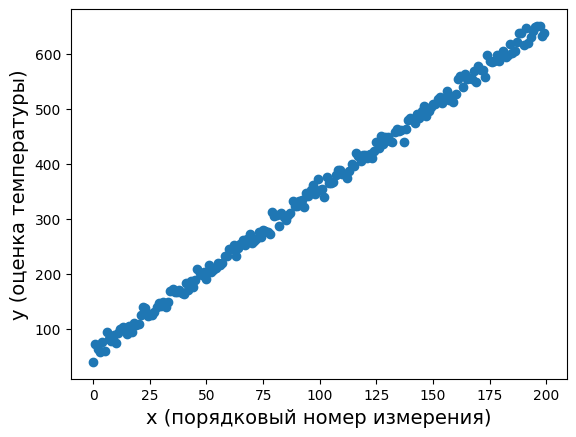

In [30]:
import random
import matplotlib.pyplot as plt
import numpy as np
# код реализуемый выше приведенное выражение с заданными начальными значениями:

def datasets_make_regression(coef, data_size, noise_sigma, random_state):
    x = np.arange(0, data_size, 1.)
    mu = 0.0
    random.seed(random_state)
    noise = np.empty((data_size, 1))
    y = np.empty((data_size, 1))

    for i in range(data_size):
        noise[i] = random.gauss(mu, noise_sigma)
        y[i] = coef[0] + coef[1]*x[i] + noise[i]

    return x, y

coef_true = [54, 3.] # весовые коэффициенты
data_size = 200 # размер генерируемого набора данных
noise_sigma = 9 # СКО шума в данных
random_state = 25
x_scale, y_estimate = datasets_make_regression(coef_true, data_size, noise_sigma, random_state)

print("сгенерированный набор данных имеет вид")
plt.plot(x_scale, y_estimate, 'o')
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (оценка температуры)', fontsize=14)

In [31]:
#первый алгоритм
def coefficient_reg_inv(x, y):
    size = len(x)
    # формируем и заполняем матрицу размерностью 2x2
    A = np.empty((2, 2))
    A[[0], [0]] = sum((x[i])**2 for i in range(0,size))
    A[[0], [1]] = sum(x)
    A[[1], [0]] = sum(x)
    A[[1], [1]] = size
    # находим обратную матрицу
    A = np.linalg.inv(A)
    # формируем и заполняем матрицу размерностью 2x1
    C = np.empty((2, 1))
    C[0] = sum((x[i]*y[i]) for i in range(0,size))
    C[1] = sum((y[i]) for i in range(0,size))

    # умножаем матрицу на вектор
    ww = np.dot(A, C)
    return ww[1], ww[0]

[w0_1, w1_1] = coefficient_reg_inv(x_scale, y_estimate)
print(w0_1, w1_1)

[54.46614479] [3.00762237]


In [32]:
#второй алгоритм
def coefficient_reg_inv_analit(x, y):
    size = len(x)
    # выполним расчет числителя первого элемента вектора
    numerator_w1 = size*sum(x[i]*y[i] for i in range(0,size)) - sum(x)*sum(y)
    # выполним расчет знаменателя (одинаковый для обоих элементов вектора)
    denominator = size*sum((x[i])**2 for i in range(0,size)) - (sum(x))**2
    # выполним расчет числителя второго элемента вектора
    numerator_w0 = -sum(x)*sum(x[i]*y[i] for i in range(0,size)) + sum((x[i])**2 for i in range(0,size))*sum(y)

    # расчет искомых коэффициентов
    w1 = numerator_w1/denominator
    w0 = numerator_w0/denominator
    return w0, w1
# определить x_scale
[w0_2, w1_2] = coefficient_reg_inv_analit(x_scale, y_estimate)
print(w0_2, w1_2)

[54.46614479] [3.00762237]


In [33]:
#третий алгоритм
def coefficient_reg_stat(x, y):
    size = len(x)
    avg_x = sum(x)/len(x) # оценка МО величины x
    avg_y = sum(y)/len(y) # оценка МО величины y
    # оценка МО величины x*y
    avg_xy = sum(x[i]*y[i] for i in range(0,size))/size
    # оценка СКО величины x
    std_x = (sum((x[i] - avg_x)**2 for i in range(0,size))/size)**0.5
    # оценка СКО величины y
    std_y = (sum((y[i] - avg_y)**2 for i in range(0,size))/size)**0.5
    # оценка коэффициента корреляции величин x и y
    corr_xy = (avg_xy - avg_x*avg_y)/(std_x*std_y)

    # расчет искомых коэффициентов
    w1 = corr_xy*std_y/std_x
    w0 = avg_y - avg_x*w1
    return w0, w1
[w0_3, w1_3] = coefficient_reg_stat(x_scale, y_estimate)
print(w0_3, w1_3)

[54.46614479] [3.00762237]


##Sklearn

In [34]:
from sklearn.linear_model import LinearRegression
# преобразование размерности массива x_scale для корректной работы model.fit
x_scale = x_scale.reshape((-1,1))
model = LinearRegression()
model.fit(x_scale, y_estimate)
print(model.intercept_, model.coef_)

[54.46614479] [[3.00762237]]


Text(0, 0.5, 'y (оценка температуры)')

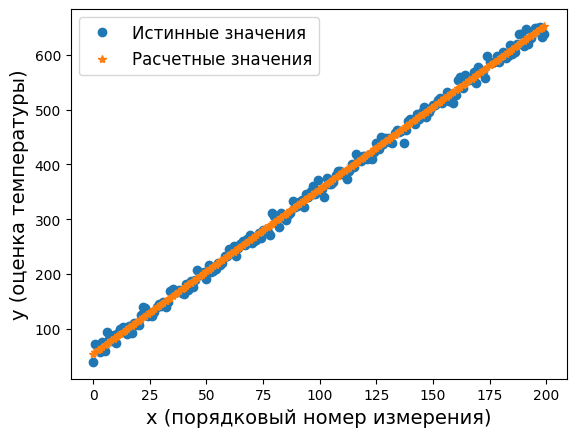

In [35]:
def predict(w0, w1, x_scale):
    y_pred = [w0 + val*w1 for val in x_scale]
    return y_pred

y_predict = predict(w0_1, w1_1, x_scale)

plt.plot(x_scale, y_estimate, 'o', label = 'Истинные значения')
plt.plot(x_scale, y_predict, '*', label = 'Расчетные значения')
plt.legend(loc = 'best', fontsize=12)
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (оценка температуры)', fontsize=14)

Text(0, 0.5, 'y (оценка температуры)')

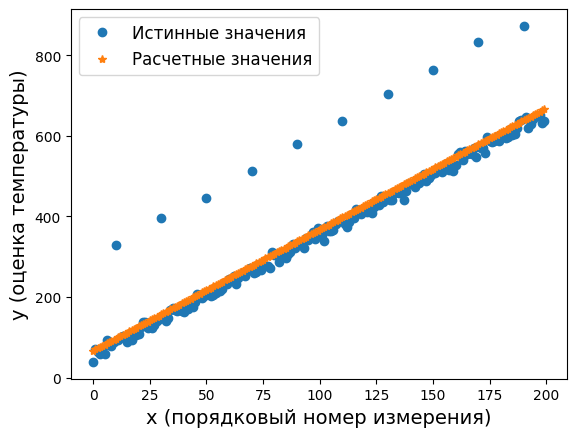

In [36]:
ni = 10 # количество выбросов
ind_impuls = np.arange(ni, data_size, 20) # индексы выбросов
y_estimate_imp = y_estimate.copy() # выборка с выбросами
for i in range(0, ni):
    y_estimate_imp[ind_impuls[i]] += 256

[w0_imp, w1_imp] = coefficient_reg_stat(x_scale, y_estimate_imp)
y_pred_imp = predict(w0_imp, w1_imp, x_scale)
plt.plot(x_scale, y_estimate_imp, 'o', label = 'Истинные значения')
plt.plot(x_scale, y_pred_imp, '*', label = 'Расчетные значения')
plt.legend(loc = 'best', fontsize=12)
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (оценка температуры)', fontsize=14)

Text(0, 0.5, 'Квадрат ошибки')

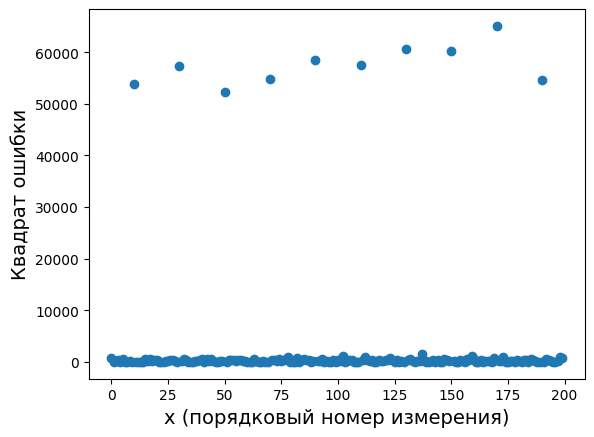

In [37]:
SqErr = (y_pred_imp - y_estimate_imp)**2

plt.plot(x_scale, SqErr, 'o')
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('Квадрат ошибки', fontsize=14)

Text(0, 0.5, 'w1')

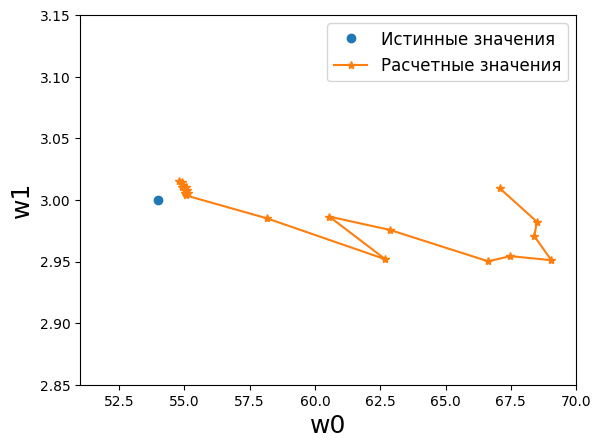

In [39]:
def censor_data(SqErr, nCensor):
    # индексы отсортированного во возрастанию массива с квадратами ошибок
    I = np.argsort(SqErr[:,0])
    ind_imp = I[-nCensor:]
    ind_imp = ind_imp[::-1] # разворот индексов массива
    w0 = np.empty((nCensor, 1))
    w1 = np.empty((nCensor, 1))

    for i in range(0,nCensor):
        # цензурирование данных
        x_scale_cens = np.delete(x_scale, ind_imp[0:i], 0)
        y_estimate_imp_cens = np.delete(y_estimate_imp, ind_imp[0:i], 0)
        # расчёт параметров модельной прямой
        w0[i], w1[i] = coefficient_reg_stat(x_scale_cens, y_estimate_imp_cens)
        y_pred2_cens = predict(w0[i], w1[i], x_scale_cens)
    return w0, w1

nCensor = 20 # количество отбрасываемых выбросов
[w0_с, w1_с] = censor_data(SqErr, nCensor)

plt.plot(coef_true[0], coef_true[1], 'o', label = 'Истинные значения')
plt.plot(w0_с, w1_с, '-*', label = 'Расчетные значения')
plt.legend(loc = 'best', fontsize=12)
plt.xlim((51, 70))
plt.ylim((2.85, 3.15))
plt.xlabel('w0', fontsize=18)
plt.ylabel('w1', fontsize=18)

Text(0, 0.5, 'Y (оценка температуры)')

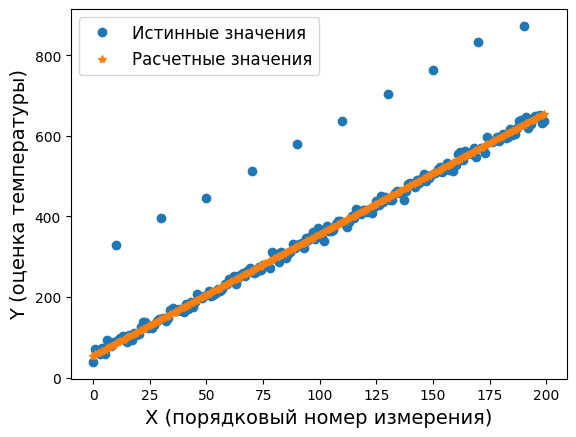

In [40]:
y_pred_censor = predict(w0_с[nCensor-1], w1_с[nCensor-1], x_scale)

plt.plot(x_scale, y_estimate_imp, 'o', label = 'Истинные значения')
plt.plot(x_scale, y_pred_censor, '*', label = 'Расчетные значения')
plt.legend(loc = 'best', fontsize=12)
plt.xlabel('X (порядковый номер измерения)', fontsize=14)
plt.ylabel('Y (оценка температуры)', fontsize=14)

Изучили МНК, повторили код из статьи с данными, которые представлены в статьеи со своими данными.

Результаты алгоритмов сошлись с результатами полученными с помощью библиотеки Sklearn.